In [345]:
'''
    ****IMPORTANT NOTE ****
   >Create two folders with same name as mentioned in below code. Run the code accordingly by keeping folders and this notebook in same directory.
   >Please choose the appropriate option after running the first cell. Check for any file name errors.
   >If any error occurs, do the changes in name as required. 
'''


import pandas as pd

def load_datasets(dataset_choice):
    # dictionary for switch-case selection for parent folders
    dataset_folders = {
        1: 'Netelixir_Dataset_1',
        2: 'Netelixir_Dataset_2'
    }
    
    #getting the folder name based on the choice
    folder = dataset_folders.get(dataset_choice, 'Netelixir_Dataset_1')  # Default is Dataset 1 if choice is invalid

    #file paths for the chosen dataset
    google_path = f'{folder}/googleads-performance.csv'
    meta_path = f'{folder}/metaads-performance.csv'
    microsoft_path = f'{folder}/microsoftads-performance.csv'
    landings_path = f'{folder}/website-landings.csv'

    # loading the csv files
    google_df = pd.read_csv(google_path)
    meta_df = pd.read_csv(meta_path)
    microsoft_df = pd.read_csv(microsoft_path)
    landings_df = pd.read_csv(landings_path)

    return google_df, meta_df, microsoft_df, landings_df

# You can switch between datasets here
dataset_choice = int(input("Enter dataset choice (1 or 2): "))  
google_df, meta_df, microsoft_df, landings_df = load_datasets(dataset_choice)



Enter dataset choice (1 or 2):  1


In [347]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           714 non-null    object 
 1   Campaign type  714 non-null    object 
 2   Impressions    714 non-null    float64
 3   Clicks         714 non-null    float64
 4   Cost           714 non-null    float64
 5   Conversions    714 non-null    float64
 6   Revenue        714 non-null    float64
dtypes: float64(5), object(2)
memory usage: 39.2+ KB


In [349]:
google_df["Campaign type"].value_counts()

Campaign type
Cross-network      182
Search Network     182
YouTube            182
Display Network    168
Name: count, dtype: int64

In [351]:
google_df.describe()

,Impressions,Clicks,Cost,Conversions,Revenue
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,103249.289916,668.372549,1194.405182,19.543697,4380.389916
std,169925.328248,925.830005,1457.968112,23.106973,5466.346579
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3614.500000,0.000000,54.600000,0.000000,0.000000
50%,14576.500000,225.500000,414.850000,6.500000,1126.150000
75%,101861.000000,870.750000,2127.500000,38.975000,8763.650000
max,698237.000000,3690.000000,6218.300000,90.200000,24422.700000


In [353]:
import pandas as pd

tempdf = google_df[['Date', 'Impressions', 'Clicks', 'Conversions', 'Cost', 'Revenue']]

#convert 'Date' column to datetime
tempdf['Date'] = pd.to_datetime(tempdf['Date'])

# group by 'Date' and sum the other columns
google_datewise = tempdf.groupby('Date').sum().reset_index()

# Feature engineering
google_datewise['DayOfWeek'] = google_datewise['Date'].dt.day_name()
google_datewise['CPC'] = google_datewise['Cost'] / google_datewise['Clicks']
google_datewise['CTR'] = google_datewise['Clicks'] / google_datewise['Impressions']
google_datewise=google_datewise[['Cost','DayOfWeek','CPC','CTR','Conversions']]        #Clicks is removed as it is correlated feature(we found during analysis)
# Display the updated DataFrame
google_datewise.head(10)



C:\Users\Virendra\AppData\Local\Temp\ipykernel_57060\814257731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['Date'] = pd.to_datetime(tempdf['Date'])


,Cost,DayOfWeek,CPC,CTR,Conversions
0,1268.0,Monday,1.097835,0.006291,11.0
1,2902.0,Tuesday,1.739808,0.007376,18.2
2,3102.8,Wednesday,2.031958,0.007353,35.1
3,2563.2,Thursday,1.914264,0.008011,36.1
4,2266.5,Friday,1.839692,0.008230,40.9
5,1041.9,Saturday,1.217173,0.006963,34.5
6,855.8,Sunday,1.132011,0.007080,33.4
7,1886.5,Monday,1.732323,0.008707,93.3
8,2169.1,Tuesday,1.792645,0.007994,68.8
9,2921.5,Wednesday,1.915738,0.007691,118.7


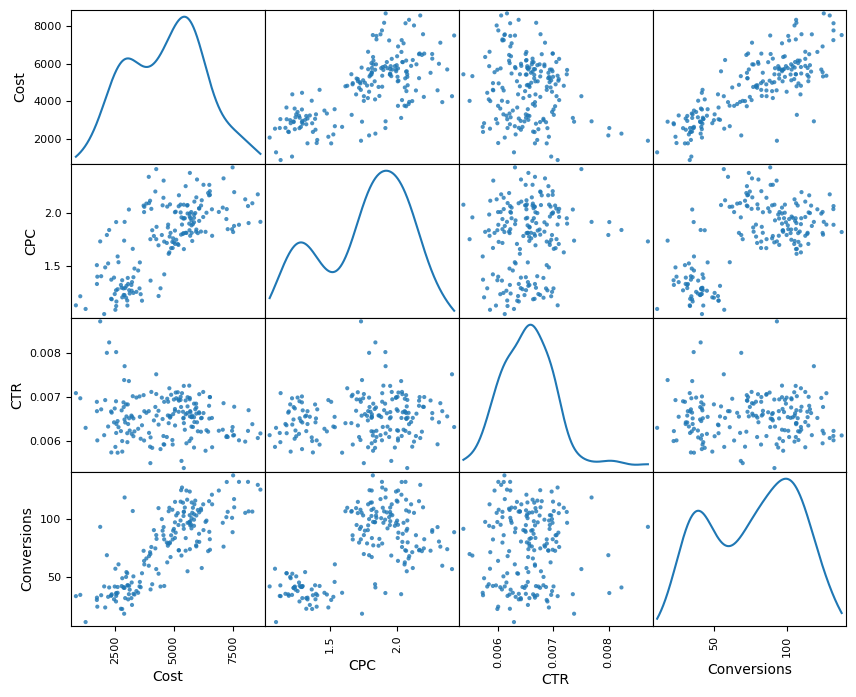

In [355]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# columns for the scatter matrix
numeric_columns = ['Cost', 'CPC', 'CTR', 'Conversions']

# Generating scatter matrix to check for correlation of data
scatter_matrix(google_datewise[numeric_columns], alpha=0.8, figsize=(10, 8), diagonal='kde')

# display
plt.show()


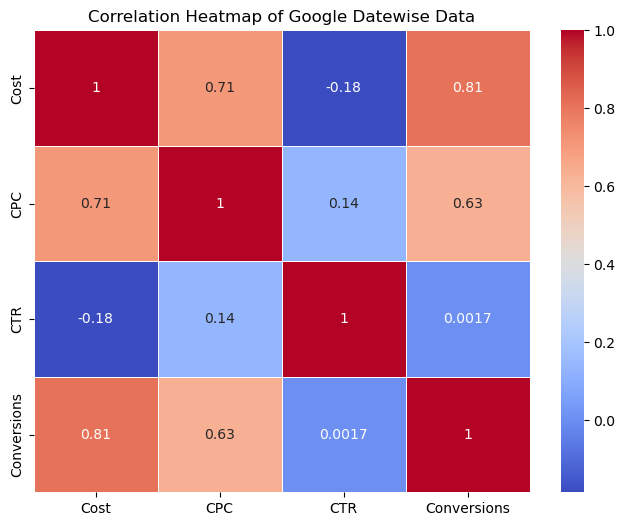

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numeric columns for correlation
numeric_columns = ['Cost', 'CPC', 'CTR', 'Conversions']

# Calculate the correlation matrix
corr_matrix = google_datewise[numeric_columns].corr()

# Create a heatmap to check for correlation of data
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Google Datewise Data')
plt.show()


In [359]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd

# One-Hot Encoding for 'DayOfWeek'
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
day_encoded = encoder.fit_transform(google_datewise[['DayOfWeek']])
day_encoded_df = pd.DataFrame(day_encoded, columns=encoder.get_feature_names_out(['DayOfWeek']))

# Add the encoded days to the original dataframe and drop the original 'DayOfWeek' column
google_datewise = pd.concat([google_datewise, day_encoded_df], axis=1).drop('DayOfWeek', axis=1)


In [361]:
#removing Outliers using IQR
Q1 = google_datewise.quantile(0.1)
Q3 = google_datewise.quantile(0.9)
IQR = Q3 - Q1
df_no_outliers = google_datewise[~((google_datewise < (Q1 - 1.5 * IQR)) | (google_datewise > (Q3 + 1.5 * IQR))).any(axis=1)]

# normalization using Min-Max scaling
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

print(normalized_df)

         Cost       CPC       CTR  Conversions  DayOfWeek_Friday  \
0    0.052689  0.034700  0.320026     0.000000               0.0   
1    0.261555  0.500635  0.700394     0.056782               0.0   
2    0.287223  0.712674  0.692402     0.190063               0.0   
3    0.218248  0.627253  0.923167     0.197950               0.0   
4    0.180323  0.573129  1.000000     0.235804               1.0   
..        ...       ...       ...          ...               ...   
176  0.849243  1.000000  0.326462     0.612776               0.0   
177  0.682023  0.775769  0.399237     0.368297               0.0   
178  0.536686  0.694204  0.455757     0.573344               1.0   
179  0.304096  0.217778  0.408275     0.116719               0.0   
180  0.219667  0.085634  0.350667     0.192429               0.0   

     DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  \
0                 1.0                 0.0               0.0   
1                 0.0                 0.0               0

In [363]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = normalized_df.drop('Conversions', axis=1)
y = normalized_df['Conversions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200, 250, 350, 450],
    'criterion': ["squared_error"],
    'max_features': ["sqrt", "log2", None],
    'max_depth': [10]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_rf_google = grid_search.best_estimator_
best_rf_google.fit(X_train, y_train)

# Predict on the test set
y_gpred = best_rf_google.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_gpred)
r2 = r2_score(y_test, y_gpred)

# Define the MAPE function
def mean_absolute_percentage_error(y_true, y_gpred):
    y_true, y_gpred = np.array(y_true), np.array(y_gpred)
    return np.mean(np.abs((y_true - y_gpred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_gpred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Percentage Error: {mape}%')


Best parameters found:  {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 250}
Mean Squared Error: 0.012200360477015323
R^2 Score: 0.7872243741361193
Mean Absolute Percentage Error: 14.629741938189797%


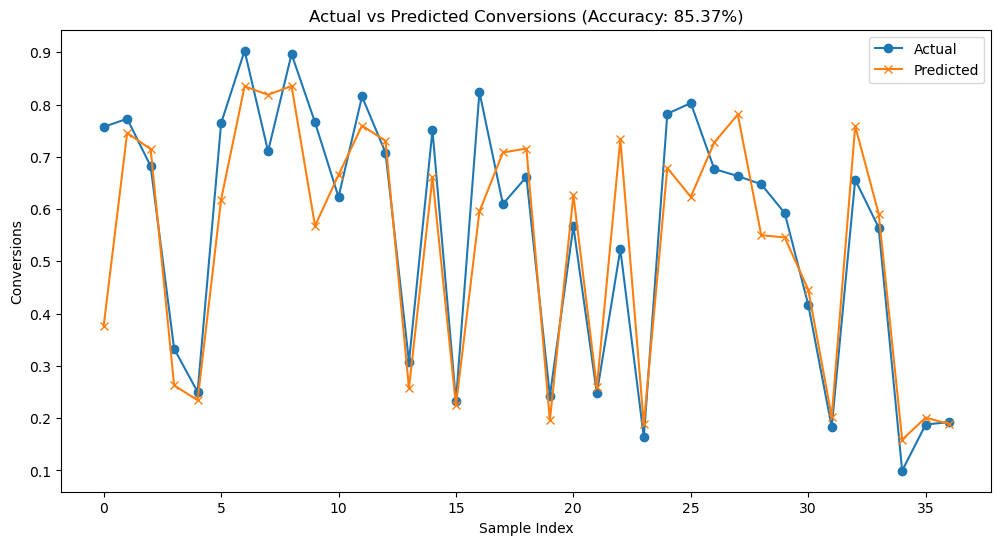

In [364]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the test data to make a meaningful line plot
X_test_sorted, y_test_sorted = zip(*sorted(zip(X_test.index, y_test)))
y_pred_sorted = [y_gpred[i] for i in np.argsort(X_test.index)]

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((np.array(y_test_sorted) - np.array(y_pred_sorted)) / np.array(y_test_sorted))) * 100
accuracy = 100 - mape

# Plot the actual vs predicted conversions
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label='Actual', marker='o')
plt.plot(y_pred_sorted, label='Predicted', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Conversions')
plt.title(f'Actual vs Predicted Conversions (Accuracy: {accuracy:.2f}%)')
plt.legend()
plt.show()


In [367]:
import pandas as pd

# Select relevant columns
tempdf = meta_df[['Date', 'Impressions', 'Clicks', 'Conversions', 'Cost', 'Revenue']]

# Convert 'Date' column to datetime
tempdf['Date'] = pd.to_datetime(tempdf['Date'])

# Group by 'Date' and sum the other columns
meta_datewise = tempdf.groupby('Date').sum().reset_index()

# Add a new column for the day of the week
meta_datewise['dayofweek'] = meta_datewise['Date'].dt.day_name()
meta_datewise['cpc'] = meta_datewise['Cost'] / meta_datewise['Clicks']
meta_datewise['ctr'] = meta_datewise['Clicks'] / meta_datewise['Impressions']
meta_datewise=meta_datewise[[ 'Cost','dayofweek','cpc','ctr','Conversions']]     #Clicks is removed as it is correlated feature(we found during analysis)

# Display the updated DataFrame
meta_datewise.head(10)

C:\Users\Virendra\AppData\Local\Temp\ipykernel_57060\1743793258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['Date'] = pd.to_datetime(tempdf['Date'])


,Cost,dayofweek,cpc,ctr,Conversions
0,209.1,Monday,0.343914,0.016873,4.0
1,204.9,Tuesday,0.397093,0.016751,11.0
2,198.7,Wednesday,0.463170,0.016267,4.0
3,131.2,Thursday,0.404938,0.018670,4.0
4,114.0,Friday,0.508929,0.018611,2.0
5,113.6,Saturday,0.594764,0.014852,3.0
6,120.2,Sunday,0.675281,0.010846,0.0
7,223.6,Monday,0.464865,0.021261,0.0
8,216.4,Tuesday,0.552041,0.016327,2.0
9,215.3,Wednesday,0.520048,0.017640,2.0


In [369]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd

# Verify the column name
print(meta_datewise.columns)  # Make sure 'DayOfWeek' is in the list

# If the column is named correctly, proceed with One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
day_encoded = encoder.fit_transform(meta_datewise[['dayofweek']])
day_encoded_df = pd.DataFrame(day_encoded, columns=encoder.get_feature_names_out(['dayofweek']))

# Add the encoded days to the original dataframe and drop the original 'DayOfWeek' column
meta_datewise = pd.concat([meta_datewise, day_encoded_df], axis=1).drop('dayofweek', axis=1)


Index(['Cost', 'dayofweek', 'cpc', 'ctr', 'Conversions'], dtype='object')


In [371]:
# Removing Outliers using IQR
specific_column = 'Conversions'  # Replace with the actual column name

# Calculate Q1, Q3, and IQR for the specific column
Q1 = meta_datewise[specific_column].quantile(0.1)
Q3 = meta_datewise[specific_column].quantile(0.9)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where the specific column has outliers
df_no_outliers = meta_datewise[(meta_datewise[specific_column] >= lower_bound) & (meta_datewise[specific_column] <= upper_bound)]

# Normalization using Min-Max scaling
scaler = MinMaxScaler()
normalized_dfMETA = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

print(normalized_df)

         Cost       CPC       CTR  Conversions  DayOfWeek_Friday  \
0    0.052689  0.034700  0.320026     0.000000               0.0   
1    0.261555  0.500635  0.700394     0.056782               0.0   
2    0.287223  0.712674  0.692402     0.190063               0.0   
3    0.218248  0.627253  0.923167     0.197950               0.0   
4    0.180323  0.573129  1.000000     0.235804               1.0   
..        ...       ...       ...          ...               ...   
176  0.849243  1.000000  0.326462     0.612776               0.0   
177  0.682023  0.775769  0.399237     0.368297               0.0   
178  0.536686  0.694204  0.455757     0.573344               1.0   
179  0.304096  0.217778  0.408275     0.116719               0.0   
180  0.219667  0.085634  0.350667     0.192429               0.0   

     DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  \
0                 1.0                 0.0               0.0   
1                 0.0                 0.0               0

In [373]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X_meta = normalized_df.drop('Conversions', axis=1)
y_meta = normalized_df['Conversions']

# Split the data into training and testing sets
X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(X_meta, y_meta, test_size=0.2, random_state=42)

# parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200, 250, 250, 400, 450],
    'criterion': ["squared_error",],
    'max_features': ["sqrt"],
    'max_depth': [10]
    }

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the new parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_meta_train, y_meta_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_rf_meta = grid_search.best_estimator_
best_rf_meta.fit(X_meta_train, y_meta_train)

# Predict on the test set
y_mepred = best_rf_meta.predict(X_meta_test)

# Evaluate the model
mse = mean_squared_error(y_meta_test, y_mepred)
r2 = r2_score(y_meta_test, y_mepred)

# Define the MAPE function
def mean_absolute_percentage_error(y_true, y_mepred):
    y_true, y_mepred = np.array(y_true), np.array(y_mepred)
    return np.mean(np.abs((y_true - y_mepred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_meta_test, y_mepred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Percentage Error: {mape}%')

Best parameters found:  {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 250}
Mean Squared Error: 0.012200360477015323
R^2 Score: 0.7872243741361193
Mean Absolute Percentage Error: 14.629741938189797%


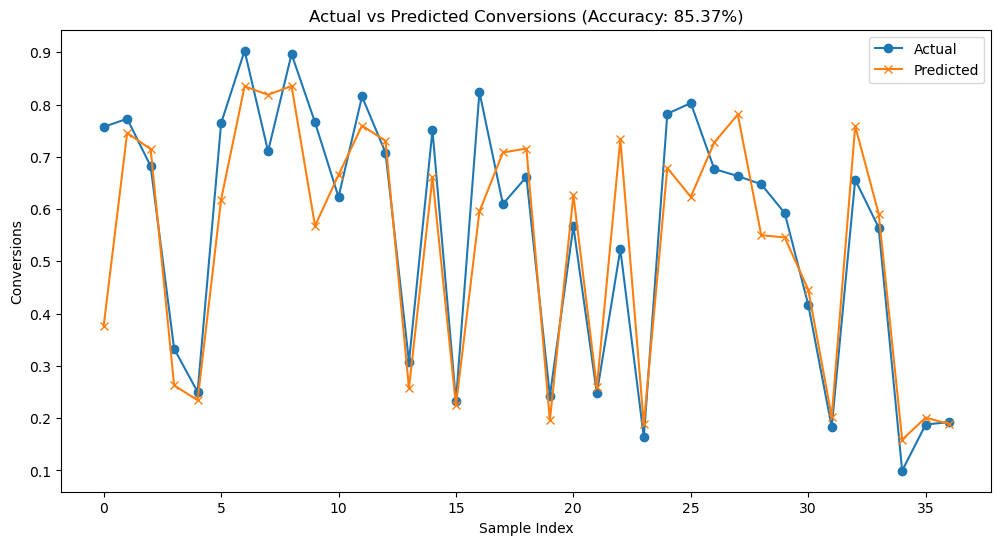

In [375]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the test data to make a meaningful line plot
X_test_sorted, y_test_sorted = zip(*sorted(zip(X_meta_test.index, y_meta_test)))
y_pred_sorted = [y_mepred[i] for i in np.argsort(X_meta_test.index)]

# Calculate Mean Absolute Percentage Error (MAPE)
y_test_sorted = np.array(y_test_sorted)
y_pred_sorted = np.array(y_pred_sorted)
mape = np.mean(np.abs((y_test_sorted - y_pred_sorted) / y_test_sorted)) * 100

# Calculate accuracy as 100% - MAPE
accuracy = 100 - mape

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label='Actual', marker='o')
plt.plot(y_pred_sorted, label='Predicted', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Conversions')
plt.title(f'Actual vs Predicted Conversions (Accuracy: {accuracy:.2f}%)')
plt.legend()
plt.show()


In [317]:
import pandas as pd

# Select relevant columns
tempdf = microsoft_df[['Date', 'Impressions', 'Clicks', 'Conversions', 'Cost', 'Revenue']]

# Convert 'Date' column to datetime
tempdf['Date'] = pd.to_datetime(tempdf['Date'])

# Group by 'Date' and sum the other columns
microsoft_datewise = tempdf.groupby('Date').sum().reset_index()

# Add a new column for the day of the week
microsoft_datewise['dayofweek'] = microsoft_datewise['Date'].dt.day_name()
microsoft_datewise['cpc'] = microsoft_datewise['Cost'] / microsoft_datewise['Clicks']#
microsoft_datewise['ctr'] = microsoft_datewise['Clicks'] / microsoft_datewise['Impressions']
microsoft_datewise=microsoft_datewise[['Cost','dayofweek','cpc','ctr','Conversions']]
# Display the updated DataFrame
microsoft_datewise.head(10)

C:\Users\Virendra\AppData\Local\Temp\ipykernel_57060\2769672988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['Date'] = pd.to_datetime(tempdf['Date'])


,Cost,dayofweek,cpc,ctr,Conversions
0,1095.5,Monday,1.137591,0.005806,2.0
1,1185.0,Tuesday,1.190955,0.004521,1.0
2,1198.1,Wednesday,1.158704,0.004706,2.0
3,1211.2,Thursday,1.139417,0.004291,1.0
4,1188.5,Friday,1.167485,0.004150,5.0
5,1093.9,Saturday,1.110558,0.005153,3.0
6,1063.2,Sunday,1.067470,0.005416,4.0
7,1164.0,Monday,1.088868,0.004541,4.0
8,1184.5,Tuesday,1.103914,0.004351,18.0
9,1261.6,Wednesday,1.189067,0.004518,21.0


In [319]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-Hot Encoding for 'DayOfWeek'
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
day_encoded = encoder.fit_transform(microsoft_datewise[['dayofweek']])
day_encoded_df = pd.DataFrame(day_encoded, columns=encoder.get_feature_names_out(['dayofweek']))

# Add the encoded days to the original DataFrame and drop the original 'DayOfWeek' column
microsoft_datewise = pd.concat([microsoft_datewise, day_encoded_df], axis=1).drop('dayofweek', axis=1)

# Removing Outliers using IQR for the 'Conversions' column
specific_column = 'Conversions'
Q1 = microsoft_datewise[specific_column].quantile(0.1)
Q3 = microsoft_datewise[specific_column].quantile(0.9)
IQR = Q3 - Q1

# Calculate bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove rows with outliers in the 'Conversions' column
df_no_outliers = microsoft_datewise[(microsoft_datewise[specific_column] >= lower_bound) & (microsoft_datewise[specific_column] <= upper_bound)]

# Normalization using Min-Max scaling
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

# Print the normalized DataFrame
print(normalized_df)


         Cost       cpc       ctr  Conversions  dayofweek_Friday  \
0    0.492092  0.450103  0.476036        0.025               0.0   
1    0.562167  0.500525  0.231910        0.000               0.0   
2    0.572424  0.470052  0.267173        0.025               0.0   
3    0.582681  0.451828  0.188190        0.000               0.0   
4    0.564908  0.478350  0.161503        0.100               1.0   
..        ...       ...       ...          ...               ...   
177  0.518165  0.668040  0.474455        0.600               0.0   
178  0.500705  0.572821  0.478724        1.000               0.0   
179  0.421312  0.554966  0.336273        0.300               1.0   
180  0.180630  0.242643  0.719156        0.125               0.0   
181  0.094895  0.013312  0.832163        0.225               0.0   

     dayofweek_Monday  dayofweek_Saturday  dayofweek_Sunday  \
0                 1.0                 0.0               0.0   
1                 0.0                 0.0               0

In [321]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X_micro = normalized_df.drop('Conversions', axis=1)
y_micro = normalized_df['Conversions']

# Split the data into training and testing sets
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro, y_micro, test_size=0.2, random_state=42)

# Define a more extensive parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200, 250, 250, 400, 450],
    'criterion': ["squared_error",],
    'max_features': ["sqrt"],
    'max_depth': [9]
    }

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the new parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_micro_train, y_micro_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_micro_train, y_micro_train)

# Predict on the test set
y_mipred = best_rf.predict(X_micro_test)

# Evaluate the model
mse = mean_squared_error(y_micro_test, y_mipred)
r2 = r2_score(y_micro_test, y_mipred)

# Define the MAPE function
def mean_absolute_percentage_error(y_true, y_mipred):
    y_true, y_mipred = np.array(y_true), np.array(y_mipred)
    return np.mean(np.abs((y_true - y_mipred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_micro_test, y_mipred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Percentage Error: {mape}%')

Best parameters found:  {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 450}
Mean Squared Error: 0.015791884904476174
R^2 Score: 0.5403494206983732
Mean Absolute Percentage Error: 25.292780713476514%


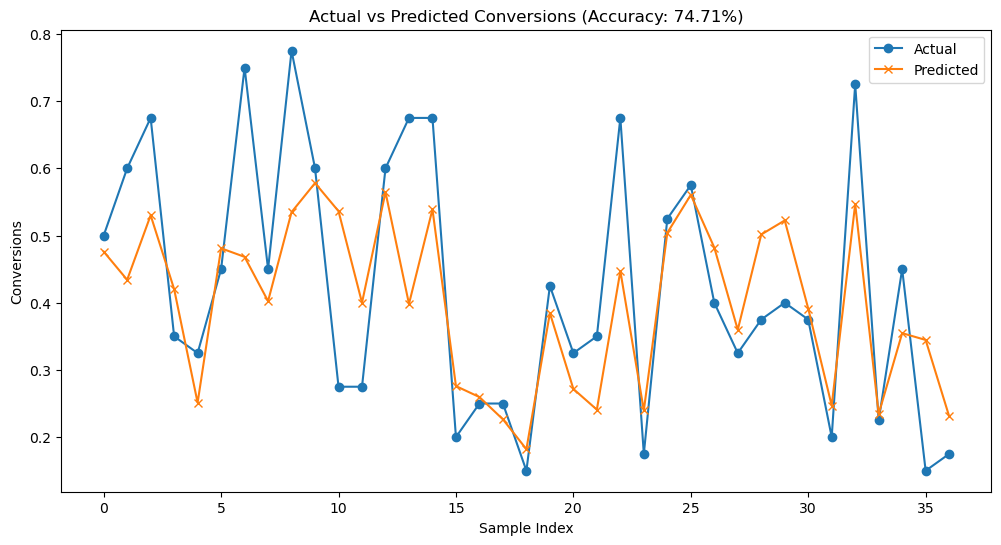

In [323]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the test data to make a meaningful line plot
X_test_sorted, y_test_sorted = zip(*sorted(zip(X_micro_test.index, y_micro_test)))
y_pred_sorted = [y_mipred[i] for i in np.argsort(X_micro_test.index)]

# Calculate Mean Absolute Percentage Error (MAPE)
y_test_sorted = np.array(y_test_sorted)
y_pred_sorted = np.array(y_pred_sorted)
mape = np.mean(np.abs((y_test_sorted - y_pred_sorted) / y_test_sorted)) * 100

# Calculate accuracy as 100% - MAPE
accuracy = 100 - mape

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label='Actual', marker='o')
plt.plot(y_pred_sorted, label='Predicted', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Conversions')
plt.title(f'Actual vs Predicted Conversions (Accuracy: {accuracy:.2f}%)')
plt.legend()
plt.show()

In [325]:
landings_df['combined'] = landings_df['Source'] + ' ' + landings_df['Channel'] + \
                          landings_df['Campaign Type'].apply(lambda x: ' ' + x if pd.notna(x) and x != '' else '')


In [327]:
landings_new = landings_df.groupby('combined')['Is Converted'].count()
landings_new.to_csv('landings_new.csv', index=True)

In [329]:
# Create the combined column as done earlier
landings_df['combined'] = landings_df['Source'] + ' ' + landings_df['Channel'] + \
                          landings_df['Campaign Type'].apply(lambda x: ' ' + x if pd.notna(x) and x != '' else '')

# Add a new column for total landings (converted + non-converted)
landings_df['Total Landings'] = landings_df.groupby('combined')['Is Converted'].transform('count')

# Group by the 'combined' field and sum up the conversions 
landings_grouped = landings_df.groupby('combined').agg(
    total_conversions=('Is Converted', 'sum'),
    total_landings=('Total Landings', 'first')  # Take the first, since it's the same for each group
)

# Step 4: Calculate conversions per landing
landings_grouped['Conversions per Landing'] = landings_grouped['total_conversions'] / landings_grouped['total_landings']

# Step 5: Sort the DataFrame based on 'Conversions per Landing'
landings_grouped = landings_grouped.sort_values(by='Conversions per Landing', ascending=False)

# Step 6: Save the sorted data to a CSV file
landings_grouped.to_csv('landings_grouped_sorted.csv', index=True)

# Display the sorted DataFrame
landings_grouped.head()


,total_conversions,total_landings,Conversions per Landing
combined,,,
google referral,2,14.0,0.142857
twitter social,7,51.0,0.137255
yahoo! mail email,7,92.0,0.076087
aol organic search,2,50.0,0.040000
duckduckgo paid search,8,303.0,0.026403


In [331]:
# ***** IMP NOTE *****
# This cell might take some extra time to run (15 to 20 mins). 


import pandas as pd
from datetime import timedelta

website_landings = pd.read_csv('website-landings.csv')
landings_grouped_sorted = pd.read_csv('landings_grouped_sorted.csv')

#ensure the Website Landing Time is treated as a datetime object
website_landings['Website Landing Time'] = pd.to_datetime(website_landings['Website Landing Time'])

# sorting by User Id and Website Landing Time for easier processing
website_landings.sort_values(by=['User Id', 'Website Landing Time'], inplace=True)
    

# function applied to website landings to create a 'combined' column
website_landings['combined'] = website_landings['Source'] + ' ' + website_landings['Channel'] + \
                          website_landings['Campaign Type'].apply(lambda x: ' ' + x if pd.notna(x) and x != '' else '')

# Track conversions from the same user for the delayed effect    i.e.channels assistance calculation
for user_id, user_data in website_landings.groupby('User Id'):
    # Identify when the user converted
    conversions = user_data[user_data['Is Converted'] == 1]
    
    # Go through each conversion and increment the count for prior landings
    for conversion_idx, conversion_row in conversions.iterrows():
        conversion_time = conversion_row['Website Landing Time']
        
        # Get previous landings that did not convert but could be responsible for the delayed conversion
        prior_landings = user_data[(user_data['Website Landing Time'] < conversion_time) & (user_data['Is Converted'] == 0)]
        
        for _, landing in prior_landings.iterrows():
            combined_channel = landing['combined']
            
            # Find the corresponding row in the landings_grouped_sorted to increment conversion
            if combined_channel in landings_grouped_sorted['combined'].values:
                # Increment the total conversions for the channel
                landings_grouped_sorted.loc[landings_grouped_sorted['combined'] == combined_channel, 'total_conversions'] += 1
            
                
# Recalculate Conversions per Landing
landings_grouped_sorted['Conversions per Landing'] = landings_grouped_sorted['total_conversions'] / landings_grouped_sorted['total_landings']

# Save the updated file
landings_grouped_sorted.to_csv('landings_grouped_sorted_updated.csv', index=False)

print("Data processing complete. Updated file saved as landings_grouped_sorted_updated.csv.")


Data processing complete. Updated file saved as landings_grouped_sorted_updated.csv.


In [333]:
import pandas as pd

data = pd.read_csv('landings_grouped_sorted_updated.csv')

# Define company categories
google_companies = [
    "google paid Cross-network", "google paid Display Network", 
    "google paid Search Network", "google paid YouTube"
]

meta_companies = [
    "facebook paid", "instagram social"
]

microsoft_companies = [
    "bing paid Audience", "bing paid Performance max", 
    "bing paid Search & content", "bing paid Shopping"
]

# Function to classify the company
def classify_company(row):
    if row['combined'] in google_companies:
        return 'Google'
    elif row['combined'] in meta_companies:
        return 'Meta'
    elif row['combined'] in microsoft_companies:
        return 'Microsoft'
    else:
        return None  # Return None if not in any category

# Apply the classification
data['Category'] = data.apply(classify_company, axis=1)

# Filter the DataFrame to keep only the rows where 'Category' is not None
Final_channel_data = data[data['Category'].notna()]


# Save the filtered data to a new CSV
output_file = 'segregated_channels.csv'
Final_channel_data.to_csv(output_file, index=False)

print(f"Data segregated successfully and saved to {output_file}")


Data segregated successfully and saved to segregated_channels.csv


In [335]:
# Example usage with predicted conversions
google_predictions = y_gpred
meta_predictions = y_mepred
microsoft_predictions = y_mipred

# Average the predict
predicted_conversions = [
    np.mean(google_predictions), 
    np.mean(meta_predictions), 
    np.mean(microsoft_predictions)
]

print(predicted_conversions)

[0.534662633159942, 0.534662633159942, 0.4006194022588245]


In [337]:
g, me, mi = 0, 0, 0
lg, lme, lmi = 0, 0, 0

# Iterate through the DataFrame rows
for index, row in Final_channel_data.iterrows(): 
    if row['Category'] == 'Google':
        g += row['Conversions per Landing']
        lg += 1
    elif row['Category'] == 'Meta':
        me += row['Conversions per Landing']
        lme += 1
    else:
        mi += row['Conversions per Landing']
        lmi += 1

# Calculate the average conversions per landing
google_wt = g/lg if lg > 0 else 0
meta_wt = me/lme if lme > 0 else 0
microsoft_wt = mi/lmi if lmi > 0 else 0

# Define the dictionary with weighted conversions per landing
conversions_per_landing = {
    'microsoft': microsoft_wt,
    'meta': meta_wt,
    'google': google_wt
}

# Apply weights to the predictions
microsoft_weighted = predicted_conversions[2] * conversions_per_landing['microsoft']
meta_weighted = predicted_conversions[1] * conversions_per_landing['meta']
google_weighted = predicted_conversions[0] * conversions_per_landing['google']

In [339]:
total_weighted = microsoft_weighted + meta_weighted + google_weighted

budget = int(input("Enter the total budget to be distributed: "))
total_budget = budget

microsoft_budget = (microsoft_weighted / total_weighted) * total_budget
meta_budget = (meta_weighted / total_weighted) * total_budget
google_budget = (google_weighted / total_weighted) * total_budget

print(f"Microsoft Ads Budget: ${microsoft_budget}")
print(f"Meta Ads Budget: ${meta_budget}")
print(f"Google Ads Budget: ${google_budget}")


Enter the total budget to be distributed:  200000


Microsoft Ads Budget: $75930.78048317244
Meta Ads Budget: $26042.507474876187
Google Ads Budget: $98026.71204195138


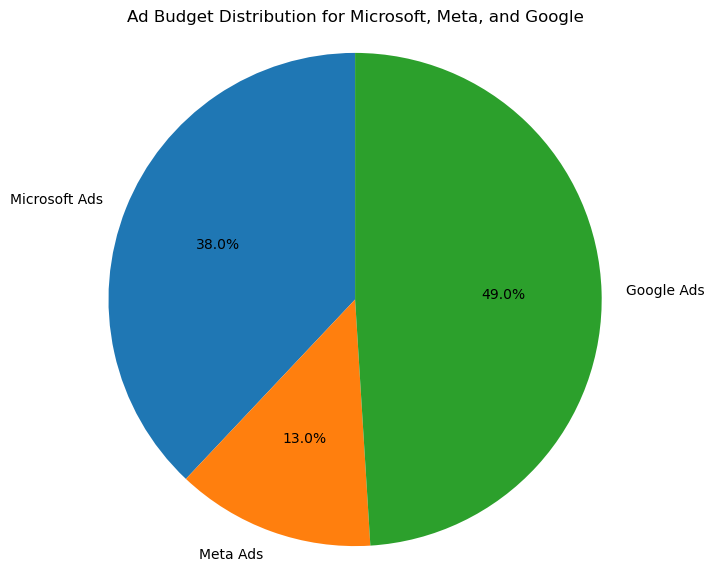

In [341]:
import matplotlib.pyplot as plt

# Budget allocations calculated from the above code
labels = ['Microsoft Ads', 'Meta Ads', 'Google Ads']
budgets = [microsoft_budget, meta_budget, google_budget]

# Colors for each section of the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # You can change the colors if you'd like

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(budgets, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Title for the pie chart
plt.title('Ad Budget Distribution for Microsoft, Meta, and Google')

# Display the pie chart
plt.show()


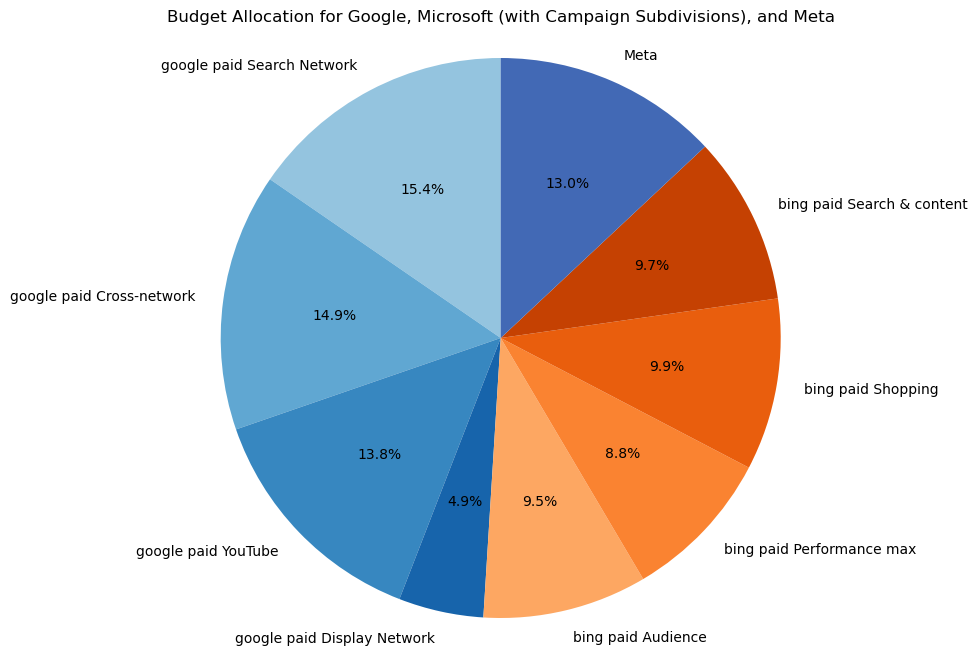

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

segregated_data = pd.read_csv('segregated_channels.csv')

# Filter campaigns by category and create dictionaries
def create_campaign_dict(df, category):
    category_data = df[df['Category'] == category]
    return dict(zip(category_data['combined'], category_data['Conversions per Landing']))

google_campaigns = create_campaign_dict(segregated_data, 'Google')
microsoft_campaigns = create_campaign_dict(segregated_data, 'Microsoft')

# Function to allocate budgets based on conversions per landing, with a minimum allocation
def allocate_budget_with_minimum(campaigns, total_budget, min_allocation_pct=0.10):
    num_campaigns = len(campaigns)
    
    # Calculate minimum allocation per campaign (10% of the total budget for each platform)
    min_budget_per_campaign = min_allocation_pct * total_budget
    min_total_budget = num_campaigns * min_budget_per_campaign
    
    # Remaining budget after allocating minimum budgets
    remaining_budget = total_budget - min_total_budget
    
    # If the remaining budget is 0 or negative, just allocate the minimum to each campaign
    if remaining_budget <= 0:
        return {campaign: min_budget_per_campaign for campaign in campaigns}
    
    # Total conversions per landing
    total_cpl = sum(campaigns.values())
    
    # Allocate remaining budget proportionally based on conversions per landing
    budget_allocation = {}
    for campaign, cpl in campaigns.items():
        proportional_allocation = (cpl / total_cpl) * remaining_budget if total_cpl > 0 else 0
        # Add the proportional allocation to the minimum allocation
        budget_allocation[campaign] = min_budget_per_campaign + proportional_allocation
    
    return budget_allocation

# # Example total budget
# total_budget = 100000  # Total combined budget for Google, Microsoft, and Meta
# google_budget = 0.49 * total_budget  # 49% allocated to Google
# microsoft_budget = 0.37 * total_budget  # 37% allocated to Microsoft
# meta_budget = total_budget - (google_budget + microsoft_budget)  # Remaining budget allocated to Meta

# Allocate budgets with minimum 10% allocation for Google and Microsoft campaigns
google_allocation = allocate_budget_with_minimum(google_campaigns, google_budget)
microsoft_allocation = allocate_budget_with_minimum(microsoft_campaigns, microsoft_budget)

# Combine Google, Microsoft, and Meta allocations
total_allocations = {**google_allocation, **microsoft_allocation, 'Meta': meta_budget}

# Create labels and sizes for the pie chart
labels = list(total_allocations.keys())
sizes = list(total_allocations.values())

# Define color maps for subdivisions (Google and Microsoft)
google_colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(google_allocation)))
microsoft_colors = plt.cm.Oranges(np.linspace(0.4, 0.8, len(microsoft_allocation)))
meta_color = np.array([[0.26, 0.41, 0.71, 1]])  # Single color for Meta (Facebook and Instagram) in 2D

# Combine all colors into one list
colors = np.concatenate([google_colors, microsoft_colors, meta_color])

# Plotting the combined pie chart with campaign subdivisions for Google and Microsoft
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Budget Allocation for Google, Microsoft (with Campaign Subdivisions), and Meta')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [ ]:
'''
    JUSTIFICATION POINTS:-
   >We first trained model using Randomforest regressor for independant platform data, then stored the predicted conversions. After that we analysed
    and processed website landings data thoroughly for user journey data and from that calculated conversions per landing. Finally while allocating
    budget, we combined the values of data of predicted conversions and conversions per landing and allocated the budget. Also sub allocation of budget
    for respective channels is done in the end.
   >From above analysis, we are getting different results for both datasets.
   >In dataset 1, we see that Google has been allocated more budget beacuse it has more impact in direct converesions and delayed conversions
    (i.e. channel assistance).Following Google, Microsoft has more conversions and then at last Meta.
   > Whereas in case of dataset 2, Microsoft has more budget beacuse it has more impact in direct converesions and delayed conversions
    (i.e. channel assistance).Following Microsoft, Google has more conversions and then at last Meta.
    